In [1]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('GBPUSD_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
5011,2022-08-30 13:00:00+01:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 14:00:00+01:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 15:00:00+01:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 16:00:00+01:00,1.163399,1.167174,1.163399,1.165189,1.165189,0
5015,2022-08-30 17:00:00+01:00,1.165365,1.166521,1.164985,1.165189,1.165189,0


In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df

,timestamp,open,high,low,close,adj close,volumn
0,2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0
1,2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0
2,2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0
3,2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0
4,2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0
...,...,...,...,...,...,...,...
5011,2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 15:00:00,1.163399,1.167174,1.163399,1.165189,1.165189,0


In [24]:
adx_supertrend = ta.Strategy(
    name = 'ADX and Supertrend',
    description = 'ADX and Supertrend',
    ta = [
        {'kind': 'supertrend', 'length': 10}, # 'multiplier': 3.0},
        {'kind': 'adx', 'length': 14},
        {'kind': 'ema', 'length': 200},
        {'kind': 'atr', 'length': 14}
    ]
)
df.ta.strategy(adx_supertrend)
df

,timestamp,open,high,low,close,adj close,volumn,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0,ADX_14,DMP_14,DMN_14,EMA_200,ATRr_14
0,2021-11-04 17:00:00,0.739776,0.740192,0.739536,0.739776,0.739776,0,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-04 17:30:00,0.739826,0.739973,0.739322,0.739656,0.739656,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-04 18:00:00,0.739738,0.740028,0.739497,0.739793,0.739793,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-04 18:30:00,0.739787,0.740521,0.739618,0.740105,0.740105,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-04 19:00:00,0.740050,0.740521,0.740012,0.740329,0.740329,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2022-08-30 14:30:00,0.688241,0.688241,0.686022,0.686766,0.686766,0,0.691732,-1,NaN,0.691732,29.544776,15.683501,39.118104,0.691652,0.001444
9992,2022-08-30 15:00:00,0.686728,0.688800,0.686728,0.688563,0.688563,0,0.691732,-1,NaN,0.691732,29.963012,16.808336,35.229922,0.691621,0.001489
9993,2022-08-30 15:30:00,0.688198,0.689037,0.687299,0.687853,0.687853,0,0.691732,-1,NaN,0.691732,30.128770,16.548322,32.327069,0.691584,0.001507
9994,2022-08-30 16:00:00,0.687640,0.688279,0.686497,0.686766,0.686766,0,0.691732,-1,NaN,0.691732,30.656630,15.168754,33.385876,0.691536,0.001526


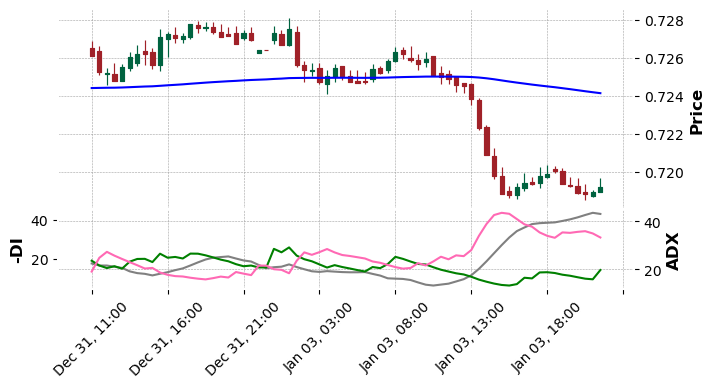

In [25]:
data_test = df.copy()
data_test.set_index('timestamp', inplace = True)

adxT1 = data_test['ADX_14'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
adxT2= data_test['DMP_14'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
adxT3 = data_test['DMN_14'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
emaT4 = data_test['EMA_200'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

data_test_plot = data_test.loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

adxT1_plot = mpf.make_addplot(adxT1, panel=1, color='gray', width=1.5, ylabel='ADX')
adxT2_plot = mpf.make_addplot(adxT2, panel=1, color='green', width=1.5, ylabel='+DI')
adxT3_plot = mpf.make_addplot(adxT3, panel=1, color='hotpink', width=1.5, ylabel='-DI')
emaT4_plot = mpf.make_addplot(emaT4, panel=0, color='blue', width=1.5, ylabel='EMA')

mpf.plot(data_test_plot, 
         type='candle', style='charles',
         addplot=[
             adxT1_plot, 
             adxT2_plot,
             adxT3_plot,
             emaT4_plot
         ],
         figsize=(8, 4))

In [24]:
class ADX_and_Supertrend:
    def __init__(self, params):
        
        self.current_action = 'close'
        self.atr = params['atr']
        self.supertrend = params['supertrend']
        self.adx = params['adx']
        
        self.ema = params['ema']
        self.rr = params['rr']
        
        self.df = params['df']
        self.pip = params['pip']
        self.pip_value = params['pip_value']
        self.target_tp = params['target_tp']
        
        self.latest_sl = 0
        self.latest_tp = 0
        self.latest_entry = 0
        
    def get_df(self):
        return self.df
    
    def calLotSize(self, entry, exit):
        return abs(round(self.target_tp / (entry - exit)  , 2))
#         return abs(round(self.target_tp / (((entry - exit) / self.pip ) * self.pip_value ) , 2))

    def longCondition(self, row):
#          row['EMA_'+str(self.ema)] < row['low'] and \
        if  row['SUPERTd_'+str(self.supertrend)+'_3.0'] == 1 and \
                row['prev_DMP'] < row['prev_DMN'] and row['DMP_'+str(self.adx)] > row['DMN_'+str(self.adx)] and \
                row['ADX_'+str(self.adx)] > 25:
                
            row['entries'] = True
            self.current_action = 'long'
                
            self.latest_sl = row['low'] - row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] + (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)
            self.latest_entry = row['open']
                
    def longResult(self, row):
        atr_price = self.latest_entry + abs(self.latest_entry - self.latest_sl)
        if row['low'] <= self.latest_sl:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                        
#         elif row['high'] >= atr_price and row['high'] < self.latest_tp:
#             self.latest_sl = self.latest_sl + abs(self.latest_entry - self.latest_sl)
#             if row['ADX_'+str(self.adx)] > 25:
#                 self.latest_tp = self.latest_tp + abs(self.latest_entry - self.latest_sl)
                    
        elif row['high'] >= self.latest_tp:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
                    
    def shortCondition(self, row):
#           row['EMA_'+str(self.ema)] > row['high'] and \
        if  row['SUPERTd_'+str(self.supertrend)+'_3.0'] == -1 and \
                row['prev_DMP'] > row['prev_DMN'] and row['DMP_'+str(self.adx)] < row['DMN_'+str(self.adx)] and \
                row['ADX_'+str(self.adx)] > 25:
                    
            row['short_entries'] = True
            self.current_action = 'short'
                
            self.latest_sl = row['high'] + row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] - (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)
            self.latest_entry = row['open']
                
    def shortResult(self, row):
        atr_price = self.latest_entry - abs(self.latest_entry - self.latest_sl)
        if row['high'] >= self.latest_sl:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                        
#         elif row['low'] <= atr_price and row['low'] > self.latest_tp:
#             self.latest_sl = self.latest_sl - abs(self.latest_entry - self.latest_sl)
#             if row['ADX_'+str(self.adx)] > 25:
#                 self.latest_tp = self.latest_tp - abs(self.latest_entry - self.latest_sl)
                    
        elif row['low'] <= self.latest_tp:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
                                
    def createLongOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
        else:
            self.longResult(row)
        
        return row
    
    def createShortOrders(self, row):
        if self.current_action == 'close':
            self.shortCondition(row)
        else:
            self.shortResult(row)
                    
        return row
    
    def createBothOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
            self.shortCondition(row)
            
        elif self.current_action == 'long':
            self.longResult(row)
                    
        elif self.current_action == 'short':
            self.shortResult(row)
                    
        return row
                    
    def createStrategy(self):
        adx_supertrend = ta.Strategy(
            name = 'ADX and Supertrend',
            description = 'ADX and Supertrend',
            ta = [
                {'kind': 'supertrend', 'length': self.supertrend},
                {'kind': 'adx', 'length': self.adx},
                {'kind': 'ema', 'length': self.ema},
                {'kind': 'atr', 'length': self.atr}
            ]
        )
        self.df.ta.strategy(adx_supertrend)
        
        self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
        self.df['entries'] = False
        self.df['exits'] = False
        
        self.df['short_entries'] = False
        self.df['short_exits'] = False
        self.df['price_action'] = self.df['open']
        
        self.df['prev_DMP'] = self.df['DMP_'+str(self.adx)].shift(1)
        self.df['prev_DMN'] = self.df['DMN_'+str(self.adx)].shift(1)
        self.df['lot_size'] = np.nan
        
    def getBothOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createBothOrders(row), axis=1)
                                                                
        return self.df
        
    def getLongOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createLongOrders(row), axis=1)
                                                                
        return self.df
    
    def getShortOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createShortOrders(row), axis=1)
                                                                
        return self.df
        

In [19]:
pair_test = ADX_and_Supertrend({
    'atr': 15,
    'ema': 200,
    'supertrend': 42,
    'adx': 10,
    'pip': 0.0001,
    'pip_value': 10,
    'rr': 1.5,
    'target_tp': 10,
    'df': df.copy()
})
result_long = pair_test.getLongOrders().set_index('timestamp')
result_short = pair_test.getShortOrders().set_index('timestamp')
result_both = pair_test.getBothOrders().set_index('timestamp')
result_both

,open,high,low,close,adj close,volumn,SUPERT_35_3.0,SUPERTd_35_3.0,SUPERTl_35_3.0,SUPERTs_35_3.0,...,EMA_200,ATRr_10,entries,exits,short_entries,short_exits,price_action,prev_DMP,prev_DMN,lot_size
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0,0.000000,1,NaN,NaN,...,NaN,NaN,False,False,False,False,1.349364,NaN,NaN,NaN
2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0,NaN,1,NaN,NaN,...,NaN,NaN,False,False,False,False,1.349382,NaN,NaN,NaN
2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0,NaN,1,NaN,NaN,...,NaN,NaN,False,False,False,False,1.349509,NaN,NaN,NaN
2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0,NaN,1,NaN,NaN,...,NaN,NaN,False,False,False,False,1.350311,NaN,NaN,NaN
2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0,NaN,1,NaN,NaN,...,NaN,NaN,False,False,False,False,1.349692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0,1.168168,1,1.168168,NaN,...,1.182105,0.002175,False,False,False,False,1.171921,22.970302,21.746658,NaN
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0,1.168168,1,1.168168,NaN,...,1.181984,0.002232,False,False,False,False,1.169892,20.863317,24.225961,NaN
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0,1.172408,-1,NaN,1.172408,...,1.181794,0.002762,False,False,False,False,1.168484,19.115782,22.196767,NaN


In [20]:
port = vbt.Portfolio.from_signals(result_both.price_action,
                                  entries=result_both.entries.astype('bool'),
                                  exits=result_both.exits.astype('bool'),
                                  short_entries=result_short.short_entries.astype('bool'),
                                  short_exits=result_short.short_exits.astype('bool'),
                                  size=result_both.lot_size, 
                                  freq="15m",
                                  init_cash=10000,
                                  fees=0.00025, 
                                  slippage=0.00025
                                 )

In [21]:
port.plot().show()

<AxesSubplot:xlabel='timestamp'>

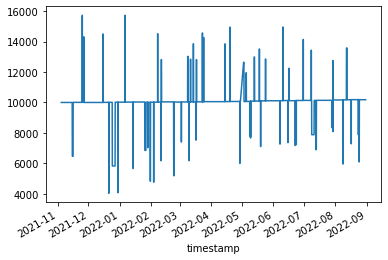

In [22]:
port.cash().plot()

In [23]:
port.stats()

Start                               2021-11-04 17:00:00
End                                 2022-08-30 16:00:00
Period                                 52 days 06:00:00
Start Value                                     10000.0
End Value                                  10180.498367
Total Return [%]                               1.804984
Benchmark Return [%]                         -13.635942
Max Gross Exposure [%]                         407.3736
Total Fees Paid                               98.084105
Max Drawdown [%]                               0.293935
Max Drawdown Duration                   5 days 03:45:00
Total Trades                                         56
Total Closed Trades                                  56
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  80.357143
Best Trade [%]                                 0.455545
Worst Trade [%]                               -1

In [21]:
print(port.stats()['Start'])
print(port.stats()['End'])
print(port.stats()['Period'])
print(port.stats()['Start Value'])
print(port.stats()['End Value'])

print(port.stats()['Total Return [%]'])
print(port.stats()['Benchmark Return [%]'])
print(port.stats()['Max Gross Exposure [%]'])
print(port.stats()['Total Fees Paid'])
print(port.stats()['Max Drawdown [%]'])

print(port.stats()['Max Drawdown Duration'])
print(port.stats()['Total Trades'])
print(port.stats()['Total Closed Trades'])
print(port.stats()['Total Open Trades'])
print(port.stats()['Open Trade PnL'])

print(port.stats()['Win Rate [%]'])
print(port.stats()['Best Trade [%]'])
print(port.stats()['Worst Trade [%]'])
print(port.stats()['Avg Winning Trade [%]'])
print(port.stats()['Avg Losing Trade [%]'])

print(port.stats()['Avg Winning Trade Duration'])
print(port.stats()['Avg Losing Trade Duration'])
print(port.stats()['Profit Factor'])
print(port.stats()['Expectancy'])
print(port.stats()['Sharpe Ratio'])

print(port.stats()['Calmar Ratio'])
print(port.stats()['Omega Ratio'])
print(port.stats()['Sortino Ratio'])

2021-11-04 17:00:00
2022-08-30 16:00:00
52 days 06:00:00
10000.0
10076.769271400195
0.7676927140019553
-13.635941990677159
61.68148397259896
93.075969525907
0.3404474532371962
30 days 19:00:00
52
52
0
0.0
69.23076923076923
0.33325430183686805
-0.3983369330912224
0.1933506841914858
-0.2710550037439762
0 days 00:39:10
0 days 01:35:37.500000
1.5196377907632936
1.4763321423114144
3.057183502625042
16.118869972326042
1.2219586694272175
4.737295151526418


In [158]:
supertrend_list = list(range(35, 45+1))
adx_list = list(range(10, 20+1))
atr_list = list(range(10, 20+1))
result_list = np.zeros((len(supertrend_list), len(adx_list), len(atr_list)))
params_list = []
index_list = []

for supertrend in supertrend_list:
    for adx in adx_list:
        for atr in atr_list:
            params_list.append([supertrend, adx, atr])
            index_list.append([supertrend_list.index(supertrend), adx_list.index(adx), atr_list.index(atr)])
# params_list[5:10]
len(params_list)

1331

In [159]:
good_params = {'win_long': 0, 'info_long': '', 'win_short': 0, 'info_short': ''}
start = 0
end = len(params_list)
win_long = 0
win_short = 0

loop_num = start
for param in params_list[start:end]:
    pair_test = ADX_and_Supertrend({
        'ema': 200,
        'atr': param[2],
        'adx': param[1],
        'supertrend': param[0],
        'pip': 0.0001,
        'pip_value': 10,
        'rr': 1.5,
        'target_tp': 10,
        'df': df.copy()
    })
    result_long = pair_test.getBothOrders().set_index('timestamp') #.getLongOrders().set_index('timestamp')
#     result_short = pair_test.getShortOrders().set_index('timestamp')
    
    port_long = vbt.Portfolio.from_signals(result_long.price_action,
                                      entries=result_long.entries.astype('bool'),
                                      exits=result_long.exits.astype('bool'),
                                      short_entries=result_long.short_entries.astype('bool'),
                                      short_exits=result_long.short_exits.astype('bool'),
                                      size=result_long.lot_size, 
                                      freq="1h",
                                      init_cash=20000,
    #                                   fees=0.0005, 
                                      slippage=0.0002
                                     )    

#     port_short = vbt.Portfolio.from_signals(result_short.price_action,
#                                       short_entries=result_short.short_entries.astype('bool'),
#                                       short_exits=result_short.short_exits.astype('bool'),
#                                       size=result_short.lot_size,
#                                       size_type=0,
#                                       freq="15m",
#                                       init_cash=20000,
#     #                                   fees=0.0005, 
#                                       slippage=0.0002
#                                      )
    
    stats_long = port_long.stats()
#     stats_short = port_short.stats()
    
    
#     result = backtest_rsi_o2(df, ema_len=param[0], rsi_len=param[1], atr_len=param[2], overbought=param[3], oversold=param[4], rr=param[5])
    if stats_long['Win Rate [%]'] > win_long and stats_long['Total Trades'] > 50:
        win_long = stats_long['Win Rate [%]']
        good_params['win_long'] = stats_long['Win Rate [%]']
        good_params['info_long'] = {'Max Drawdown % ': stats_long["Max Drawdown [%]"], 
                                    'atr': param[2],
                                    'adx': param[1],
                                    'supertrend': param[0]
                                   }
        current_indexes = index_list[params_list.index(param)]
        result_list[current_indexes[0]][current_indexes[1]][current_indexes[2]] = stats_long['Win Rate [%]']
        
#     if stats_short['Win Rate [%]'] > win_short and stats_short['Total Trades'] > 80:
#         win_short = stats_short['Win Rate [%]']
#         good_params['win_short'] = stats_short['Win Rate [%]']
#         good_params['info_short'] = {'Max Drawdown % ': stats_short["Max Drawdown [%]"], 
#                                     'atr': param[2],
#                                     'adx': param[1],
#                                     'supertrend': param[0]
#                                    }
        
    loop_num = loop_num + 1
    print(f"run: {loop_num} to {end}", end = "\r")
    
# print(f"\nwin long: {good_params['win_long']} %\n{good_params['info_long']} \nwin short: {good_params['win_short']} %\n{good_params['info_short']} ")
print(f"\nwin both: {good_params['win_long']} %\n{good_params['info_long']}")

run: 1331 to 1331
win both: 72.22222222222221 %
{'Max Drawdown % ': 0.17513880029166312, 'atr': 15, 'adx': 10, 'supertrend': 42}


### GBPUSD 1h total trades > 80, ADX > 25
* win both: 72.22222222222221 %
* {'Max Drawdown % ': 0.17513880029166312, 'atr': 15, 'adx': 10, 'supertrend': 42}

### GBPUSD 1h total trades > 80, ADX > 20
* win both: 80.35714285714286 %
* {'Max Drawdown % ': 0.12562001740822917, 'atr': 10, 'adx': 15, 'supertrend': 35}

### GBPUSD 30m total trades > 80
* win both: 0 %

### GBPUSD 15m total trades > 80
* win both: 71.42857142857143 %
* {'Max Drawdown % ': 0.16873383901355182, 'atr': 19, 'adx': 12, 'supertrend': 42}

### EURUSD 1h total trades > 80
* win both: 0 %

### EURUSD 30m total trades > 80
* win both: 0 %

### EURUSD 15m total trades > 80
* win both: 70.23809523809523 %
* {'Max Drawdown % ': 0.18041145007524015, 'atr': 19, 'adx': 11, 'supertrend': 40}

### AUDUSD 1h total trades > 80
* win both: 0 %

### AUDUSD 30m total trades > 80
* win both: 0 %

### AUDUSD 30m total trades > 80
* win both: 69.0 %
* {'Max Drawdown % ': 0.24169842560539637, 'atr': 12, 'adx': 10, 'supertrend': 35}

### USDJPY 1h total trades > 80
* win both: 0 %

### USDJPY 30m total trades > 80
* win both: 0 %

### USDJPY 15m total trades > 80
* win both: 54.25531914893617 %
* {'Max Drawdown % ': 0.40203138157230717, 'atr': 10, 'adx': 11, 'supertrend': 35}

In [125]:
result_positive = result_list.copy() # np.zeros((len(supertrend_list), len(adx_list), len(atr_list)))

In [136]:
for i in range(len(result_positive)):
    for j in range(len(result_positive[i])):
        for k in range(len(result_positive[i][j])):
            if not (result_positive[i][j][k] < 100 and result_positive[i][j][k] > 0):
                result_positive[i][j][k] = 0
                # print(result_positive[i][j][k])
                
            # break
        # break
    # break
    # result_positive

In [166]:
volume = vbt.plotting.Volume(
    data=result_list,
    x_labels=supertrend_list,
    y_labels=adx_list,
    z_labels=atr_list
)
volume.fig

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
               …